<a href="https://colab.research.google.com/github/Hyuna13/AI/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 내가 만약 축구팀 감독이라면 

## 01. 데이터 수집하기 
- kaggle에서 fifa2019 데이터 파일 찾기 : fifa2019.csv 로 변경
> https://www.kaggle.com/karangadiya/fifa19

## 02. 데이터 불러오기 
- fifa2019.csv 파일 업로드하기

In [1]:
from google.colab import files

uploaded = files.upload()

Saving FIFA 2019.csv to FIFA 2019.csv


### [Step 1] 파일에 저장된 데이터를 불러와 출력하기

In [8]:
# (실습) pandas 라이브러리 불러오기 
import pandas as pd

# (실습)fifa2019.csv 파일의 데이터 불러오기 
fifa2019 = pd.read_csv('FIFA 2019.csv')

## (실습) fifa2019 데이터프레임의 행, 열 갯수 출력하기
print( fifa2019.shape )

(18207, 89)


### [Step 2] fifa2019에 저장된 개별값들을 열별로 확인하기

In [9]:
## (실습) 데이터의 요약 정보 출력하기 
print( fifa2019.info()   )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

## 03. 데이터 다루기 

### [Step 1] 궁금한 선수의 데이터 검색하기 


In [10]:
#(실습) fifa2019 인덱스 레이블 14인 행값을 sub1에 저장하기
sub1 = fifa2019.loc[14]
print(sub1)

Unnamed: 0                                                    14
ID                                                        215914
Name                                                    N. Kanté
Age                                                           27
Photo             https://cdn.sofifa.org/players/4/19/215914.png
                                       ...                      
GKHandling                                                    12
GKKicking                                                     10
GKPositioning                                                  7
GKReflexes                                                    10
Release Clause                                           €121.3M
Name: 14, Length: 89, dtype: object


### [Step 2] 원하는 범위의 데이터 검색하기


In [11]:
# (실습) 인덱스 레이블 2~16까지 모든 데이터를 sub2에 저장하기 
sub2 = fifa2019.loc[2:16]
print(sub2)

    Unnamed: 0      ID  ... GKReflexes  Release Clause
2            2  190871  ...       11.0         €228.1M
3            3  193080  ...       94.0         €138.6M
4            4  192985  ...       13.0         €196.4M
5            5  183277  ...        8.0         €172.1M
6            6  177003  ...        9.0         €137.4M
7            7  176580  ...       37.0           €164M
8            8  155862  ...       11.0         €104.6M
9            9  200389  ...       89.0         €144.5M
10          10  188545  ...       10.0         €127.1M
11          11  182521  ...       10.0         €156.8M
12          12  182493  ...       15.0          €90.2M
13          13  168542  ...       12.0           €111M
14          14  215914  ...       10.0         €121.3M
15          15  211110  ...        8.0         €153.5M
16          16  202126  ...       11.0         €160.7M

[15 rows x 89 columns]


### [Step 3] 전체 선수들의 이름과 선호하는 발 정보 출력하기


In [13]:
# (실습)'Name', 'Preferred Foot' 열의 모든 선수 정보를 다 출력하기 
sub3 = fifa2019.loc[:, ['Name','Preferred Foot']] #콜론이 전체를 의미
print(sub3)

                     Name Preferred Foot
0                L. Messi           Left
1       Cristiano Ronaldo          Right
2               Neymar Jr          Right
3                  De Gea          Right
4            K. De Bruyne          Right
...                   ...            ...
18202        J. Lundstram          Right
18203  N. Christoffersson          Right
18204           B. Worman          Right
18205      D. Walker-Rice          Right
18206           G. Nugent          Right

[18207 rows x 2 columns]


### [Step 4] 여러 행의 데이터 중 원하는 열 값만 골라 출력하기


In [14]:
# (실습)0~9행, 1,2열 값을 sub4에 저장하기 
sub4 = fifa2019.iloc[0:10, 1:3]
print(sub4)

       ID               Name
0  158023           L. Messi
1   20801  Cristiano Ronaldo
2  190871          Neymar Jr
3  193080             De Gea
4  192985       K. De Bruyne
5  183277          E. Hazard
6  177003          L. Modrić
7  176580          L. Suárez
8  155862       Sergio Ramos
9  200389           J. Oblak


### [Step 5] 우리나라 선수들 출력하기


In [15]:
# 국적이 한국(Korea Republic)이면 True, 그렇지 않으면 False를 korea_player(시리즈)에 저장함.
korea_player = fifa2019['Nationality'] == 'Korea Republic'
print(korea_player)
print(type(korea_player))

# (실습)korea_player가 True 인 한국 국적의 선수 데이터수 출력 
sub5 = fifa2019.loc[korea_player]
print(sub5)

0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Nationality, Length: 18207, dtype: bool
<class 'pandas.core.series.Series'>
       Unnamed: 0      ID  ... GKReflexes  Release Clause
125           125  200104  ...       10.0          €71.2M
1295         1295  180283  ...       10.0          €14.3M
1407         1407  182152  ...        9.0          €12.8M
2002         2002  211927  ...        8.0          €17.6M
2021         2021  221671  ...        8.0          €13.8M
...           ...     ...  ...        ...             ...
17955       17955  240272  ...       12.0            €73K
17959       17959  245401  ...       12.0            €73K
17965       17965  243359  ...       11.0           €131K
18058       18058  244108  ...       10.0           €104K
18084       18084  244411  ...        5.0            €73K

[335 rows x 89 columns]


### [Step 6] 우리나라 선수들의 이름 출력하기


In [16]:
# 국적이 한국인 선수들의 이름값을 sub6에 저장하기 
sub6 = sub5["Name"]
print(sub6)

125               H. Son
1295       Ki Sung Yueng
1407        Koo Ja Cheol
2002     Kwon Chang Hoon
2021        Lee Jae Sung
              ...       
17955     Min Gyeong Min
17959       Lee Dong Hee
17965       Kim Jong Jin
18058    Hong Hyeon Seok
18084        Kwon Ki Pyo
Name: Name, Length: 335, dtype: object


## 04. 데이터 시각화하기 

### [Step 1] 선수들이 선호하는 발의 종류 데이터를 막대그래프로 나타내기


Right    13948
Left      4211
Name: Preferred Foot, dtype: int64


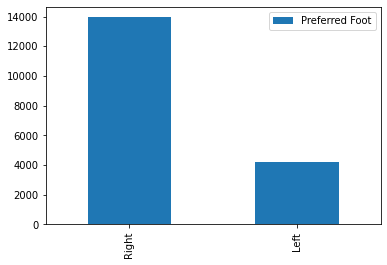

In [19]:
# matplotlib.pyplot 불러오기
import matplotlib.pyplot as plt

#(실습) 선호하는 발의 종류 세기
res = fifa2019['Preferred Foot'].value_counts()
print(res)

#막대그래프 그리기
res.plot(kind='bar')

# 범례 표시하기
plt.legend()

# 그래프 출력하기 
plt.show()

### [Step 2] 선수들이 선호하는 발의 종류를 원 그래프로 나타내기


Right    13948
Left      4211
Name: Preferred Foot, dtype: int64


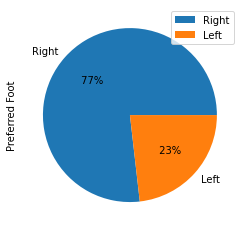

In [23]:

## 선호하는 발의 종류 세기
res = fifa2019['Preferred Foot'].value_counts()
print(res)

# (실습) 판다스의 원 그래프(pie) 그리기
res.plot(kind = 'pie', autopct = "% 1.f%   %")

# 범례 표시하기
plt.legend()

# 그래프 출력하기 
plt.show()